Import Libraries

In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

Explore the data

In [3]:
df = pd.read_csv("Healthcare-Diabetes.csv")

In [4]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df.shape

(2768, 10)

In [6]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [8]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500000,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000000,6.000,17.00
Glucose,2768.0,121.863439,30.503499,44.000,99.000,117.000000,141.000,199.00
BloodPressure,2768.0,72.404086,11.988255,24.000,64.000,72.000000,80.000,122.00
SkinThickness,2768.0,29.289634,9.031265,7.000,25.000,29.289634,32.000,110.00
BMI,2768.0,32.596665,7.103424,18.200,27.575,32.400000,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375000,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000000,1.000,1.00


The minimum value in the columns should be greater than 0. I'm checking how many cells in a given column have a zero value.

Assumptions:
  "Id" - not needed for this evaluation,
  "Pregnancies" - 0 value is valid data,
  "Outcome" - 0 value is valid data (indicates no diabetes).

In [145]:
data = df.drop(columns=["Id", "Pregnancies", "Outcome"])

num_of_zero_values_per_column = (data == 0).sum()
percentage = round(num_of_zero_values_per_column / len(df.index) * 100, 2)

result = pd.concat([num_of_zero_values_per_column, percentage], axis=1, keys=["Number of rows","Percentage of all rows"])
result.sort_values(by="Percentage of all rows")

,Number of rows,Percentage of all rows
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0


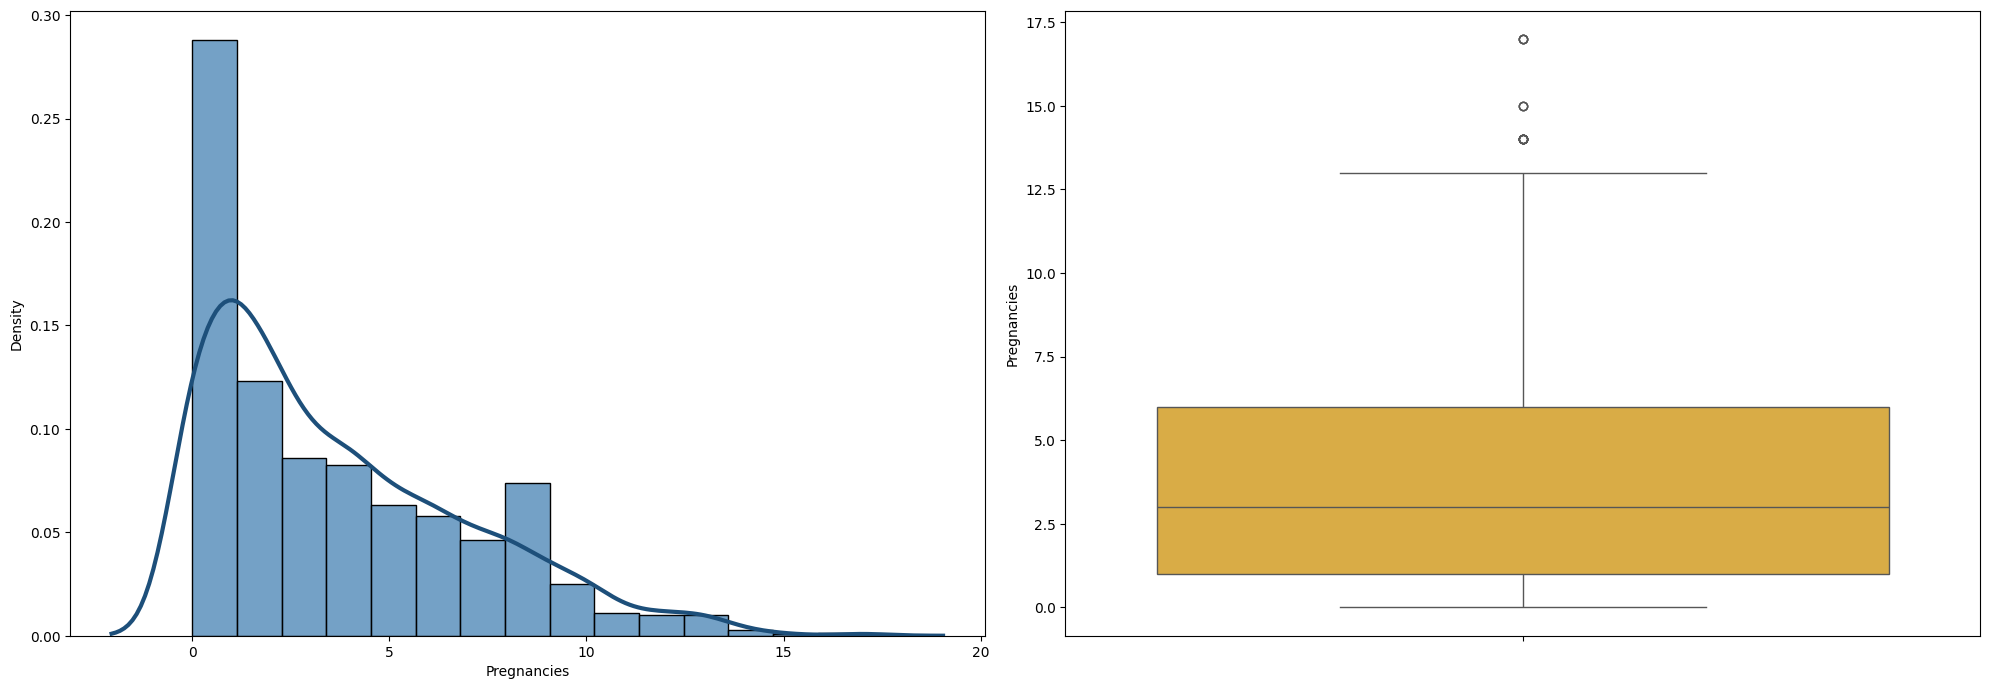

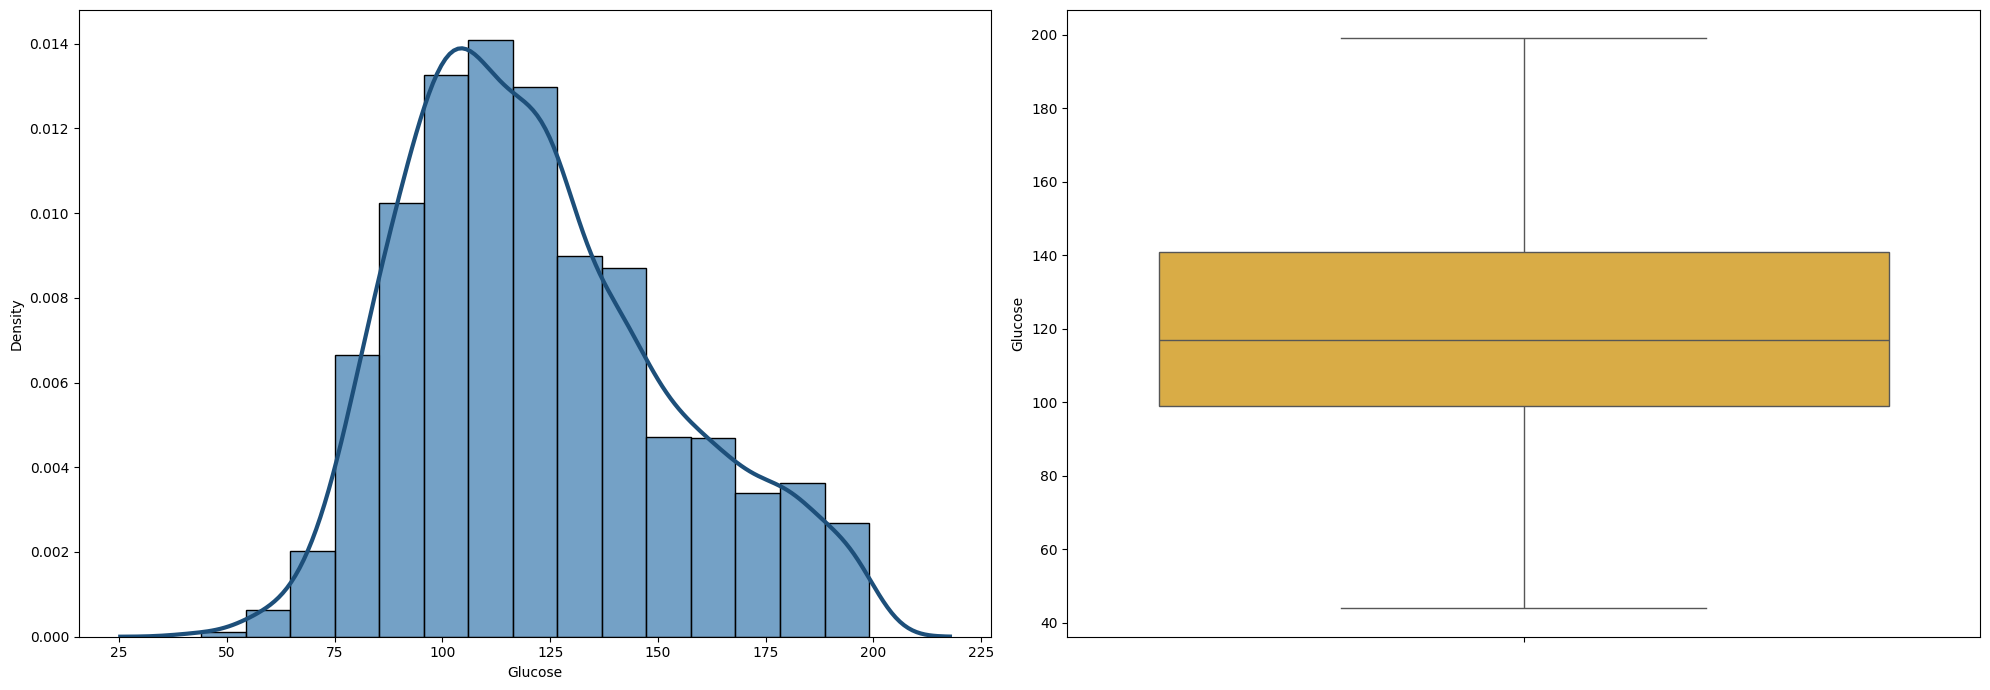

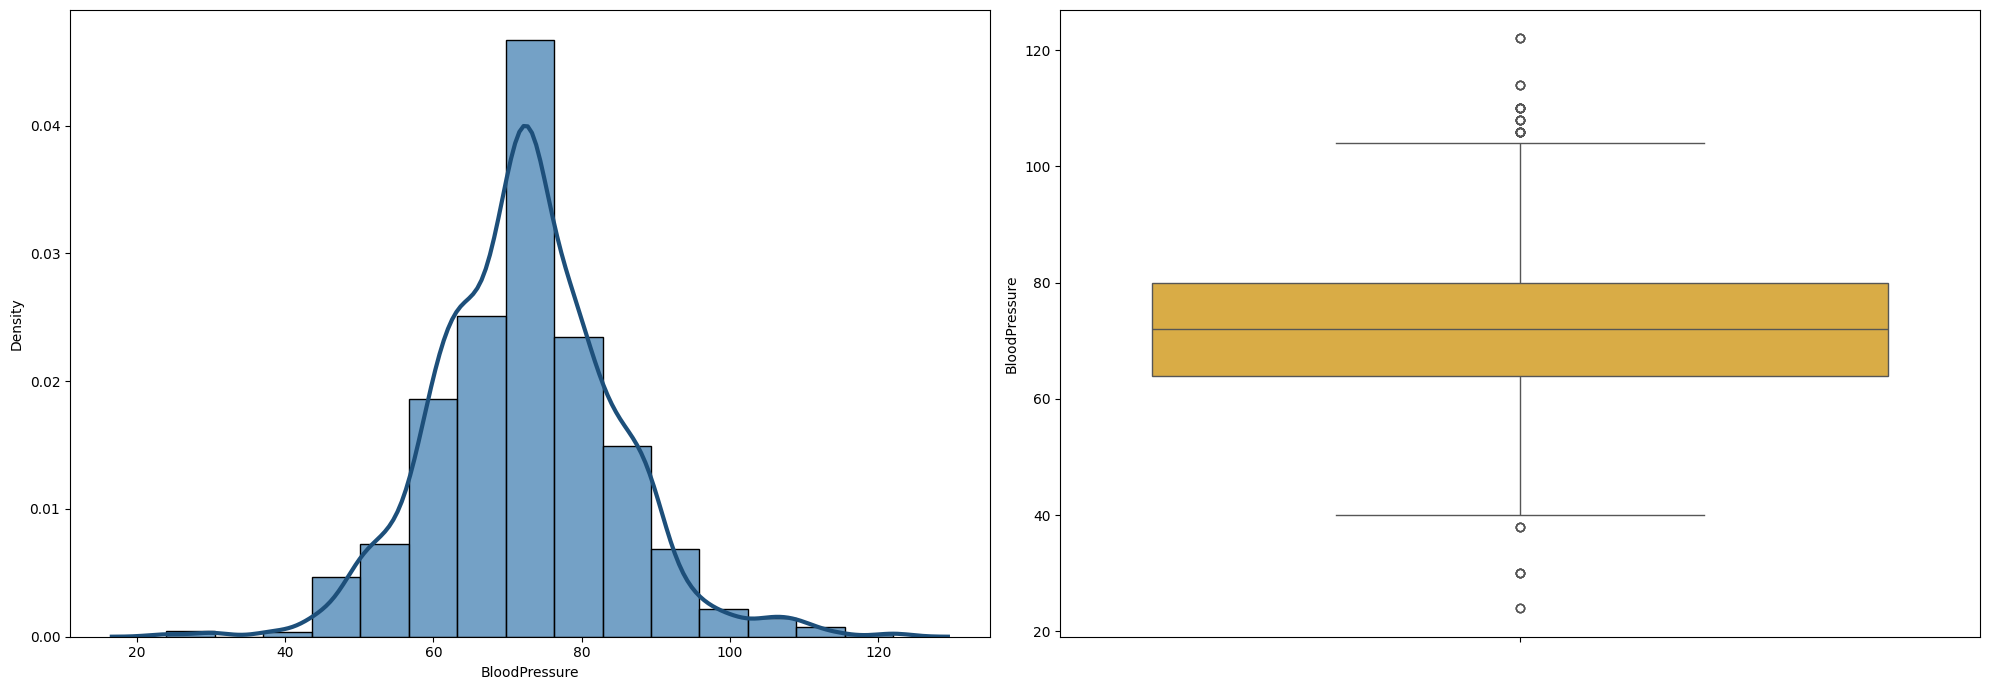

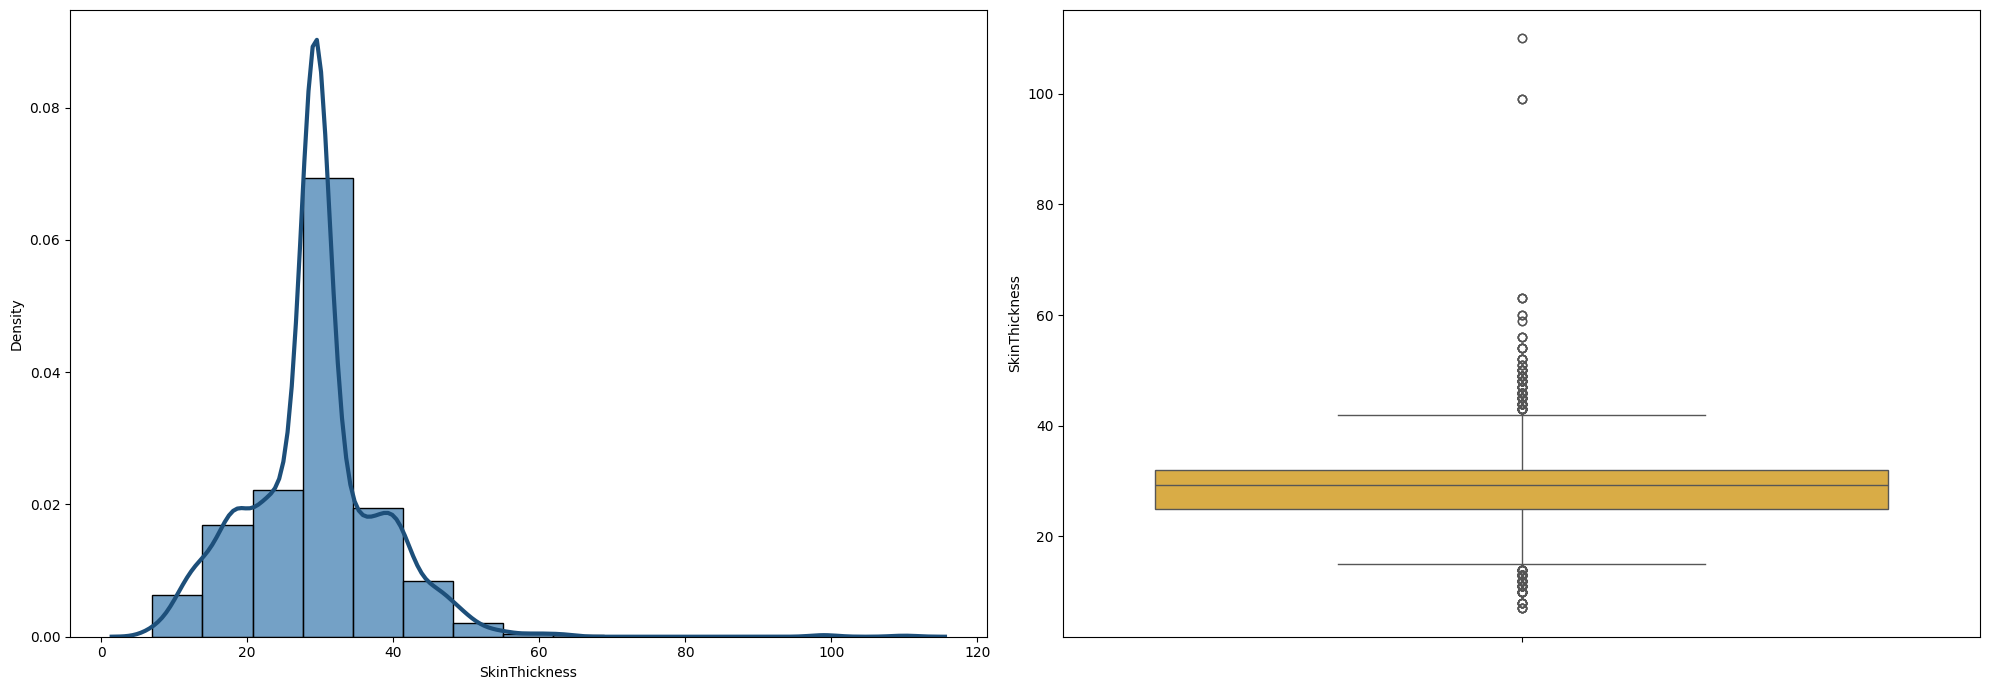

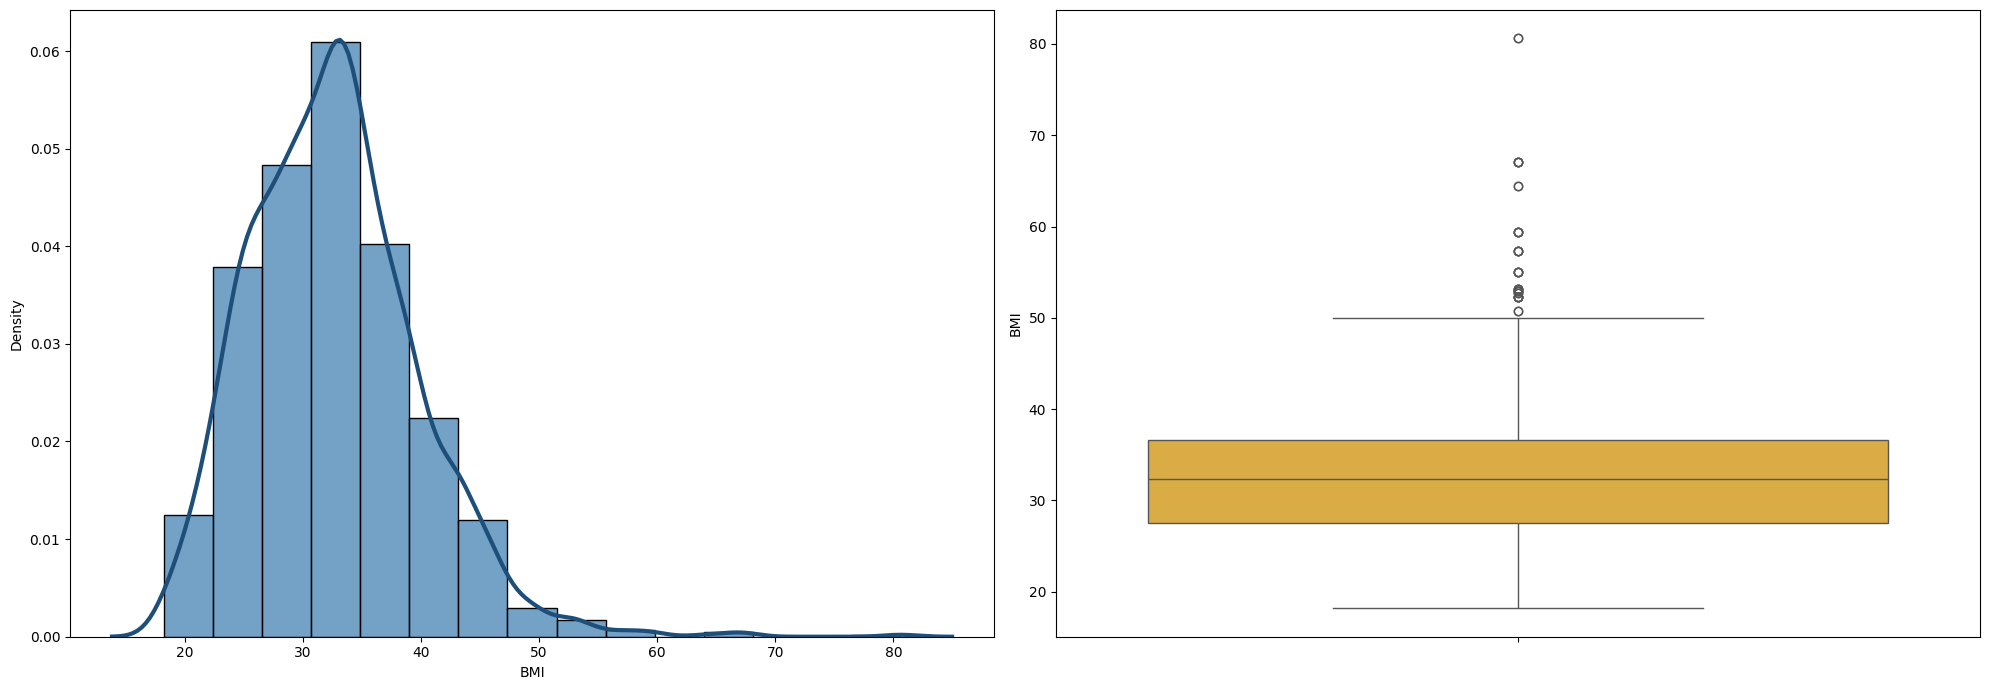

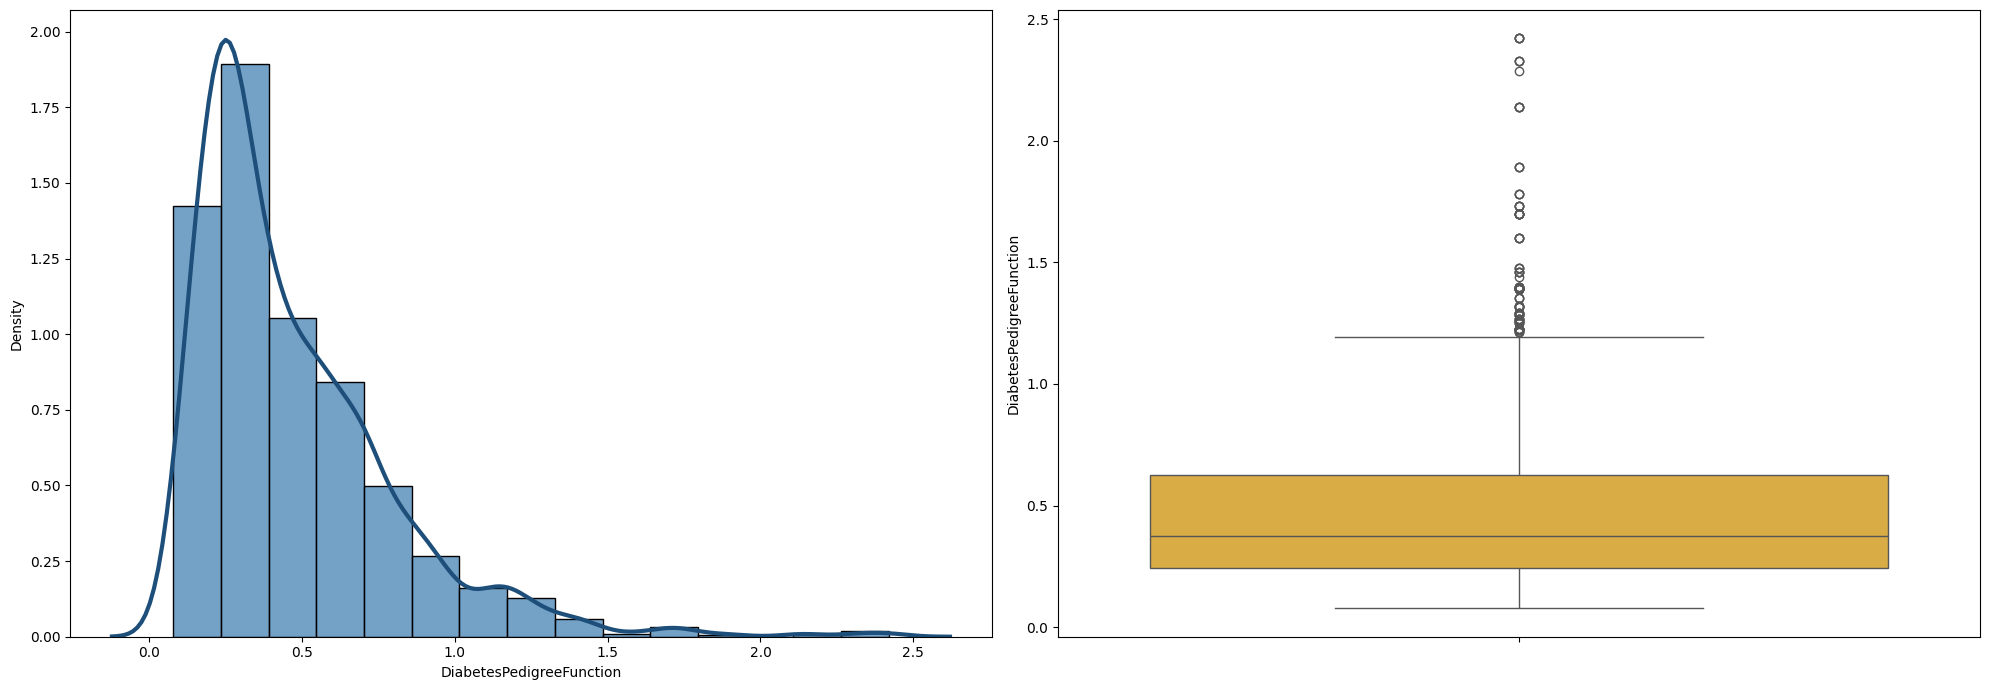

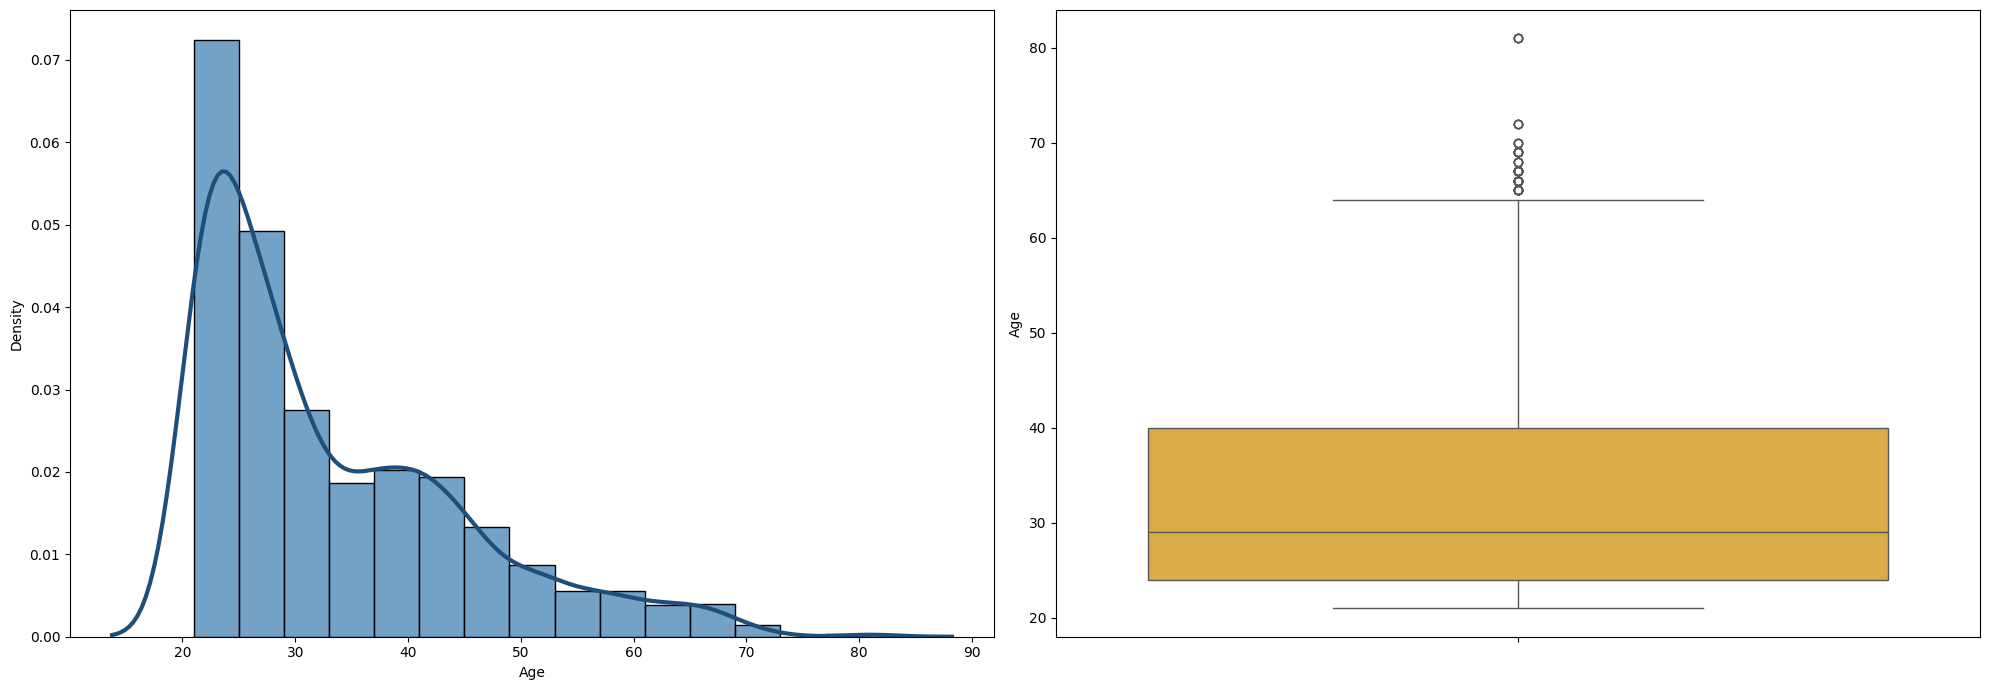

In [177]:
columns_to_plot = df.drop(columns=["Id", "Outcome"])

for column in columns_to_plot:
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    axs = axs.flatten()
    
    bins = 25
    if column == "Pregnancies" or "Age":
        bins = 15
    
    sns.histplot(df[column], bins=bins, color="steelblue", stat="density", ax=axs[0])
    sns.kdeplot(df[column], color="#1D4F7A", linewidth=3, ax=axs[0])
    sns.boxplot(df[column], color="#F2B52D", ax=axs[1])

    plt.tight_layout()

Missing data (value 0) in the 'Glucose,' 'BMI,' and 'BloodPressure' columns make up a small percentage of the data. Therefore, depending on the data distribution, the value of zero will be changed to the mean (in the case of a normal distribution) or the median.

The same strategy has been applied to the 'SkinThickness' column. Despite the missing data percentage being 28.9%, losing such a large amount of data with a relatively small dataset would be unfavorable for further analysis.

The 'Insulin' column will be removed due to the fact that the missing data percentage is almost 50%.


Glucose	18	0.65
BMI	39	1.41
BloodPressure	125	4.52
SkinThickness	800	28.90
Insulin	1330	48.05

In [122]:
glucose_median = df["Glucose"][df["Glucose"] > 0].median()
df["Glucose"] = df["Glucose"].apply(lambda x: glucose_median if x==0 else x)


In [127]:
bmi_mean = df["BMI"][df["BMI"] > 0].mean()
df["BMI"] = df["BMI"].apply(lambda x: bmi_mean if x==0 else x)

In [131]:
blood_pressure_mean = df["BloodPressure"][df["BloodPressure"] > 0].mean()
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: blood_pressure_mean if x==0 else x)

In [141]:
skin_thickness_mean = df["SkinThickness"][df["SkinThickness"] > 0].mean()
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: skin_thickness_mean if x==0 else x)

In [143]:
df = df.drop(columns="Insulin")

In [144]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148.0,72.0,35.000000,33.6,0.627,50,1
1,2,1,85.0,66.0,29.000000,26.6,0.351,31,0
2,3,8,183.0,64.0,29.289634,23.3,0.672,32,1
3,4,1,89.0,66.0,23.000000,28.1,0.167,21,0
4,5,0,137.0,40.0,35.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2764,2,75.0,64.0,24.000000,29.7,0.370,33,0
2764,2765,8,179.0,72.0,42.000000,32.7,0.719,36,1
2765,2766,6,85.0,78.0,29.289634,31.2,0.382,42,0
2766,2767,0,129.0,110.0,46.000000,67.1,0.319,26,1


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_15691/819827207.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


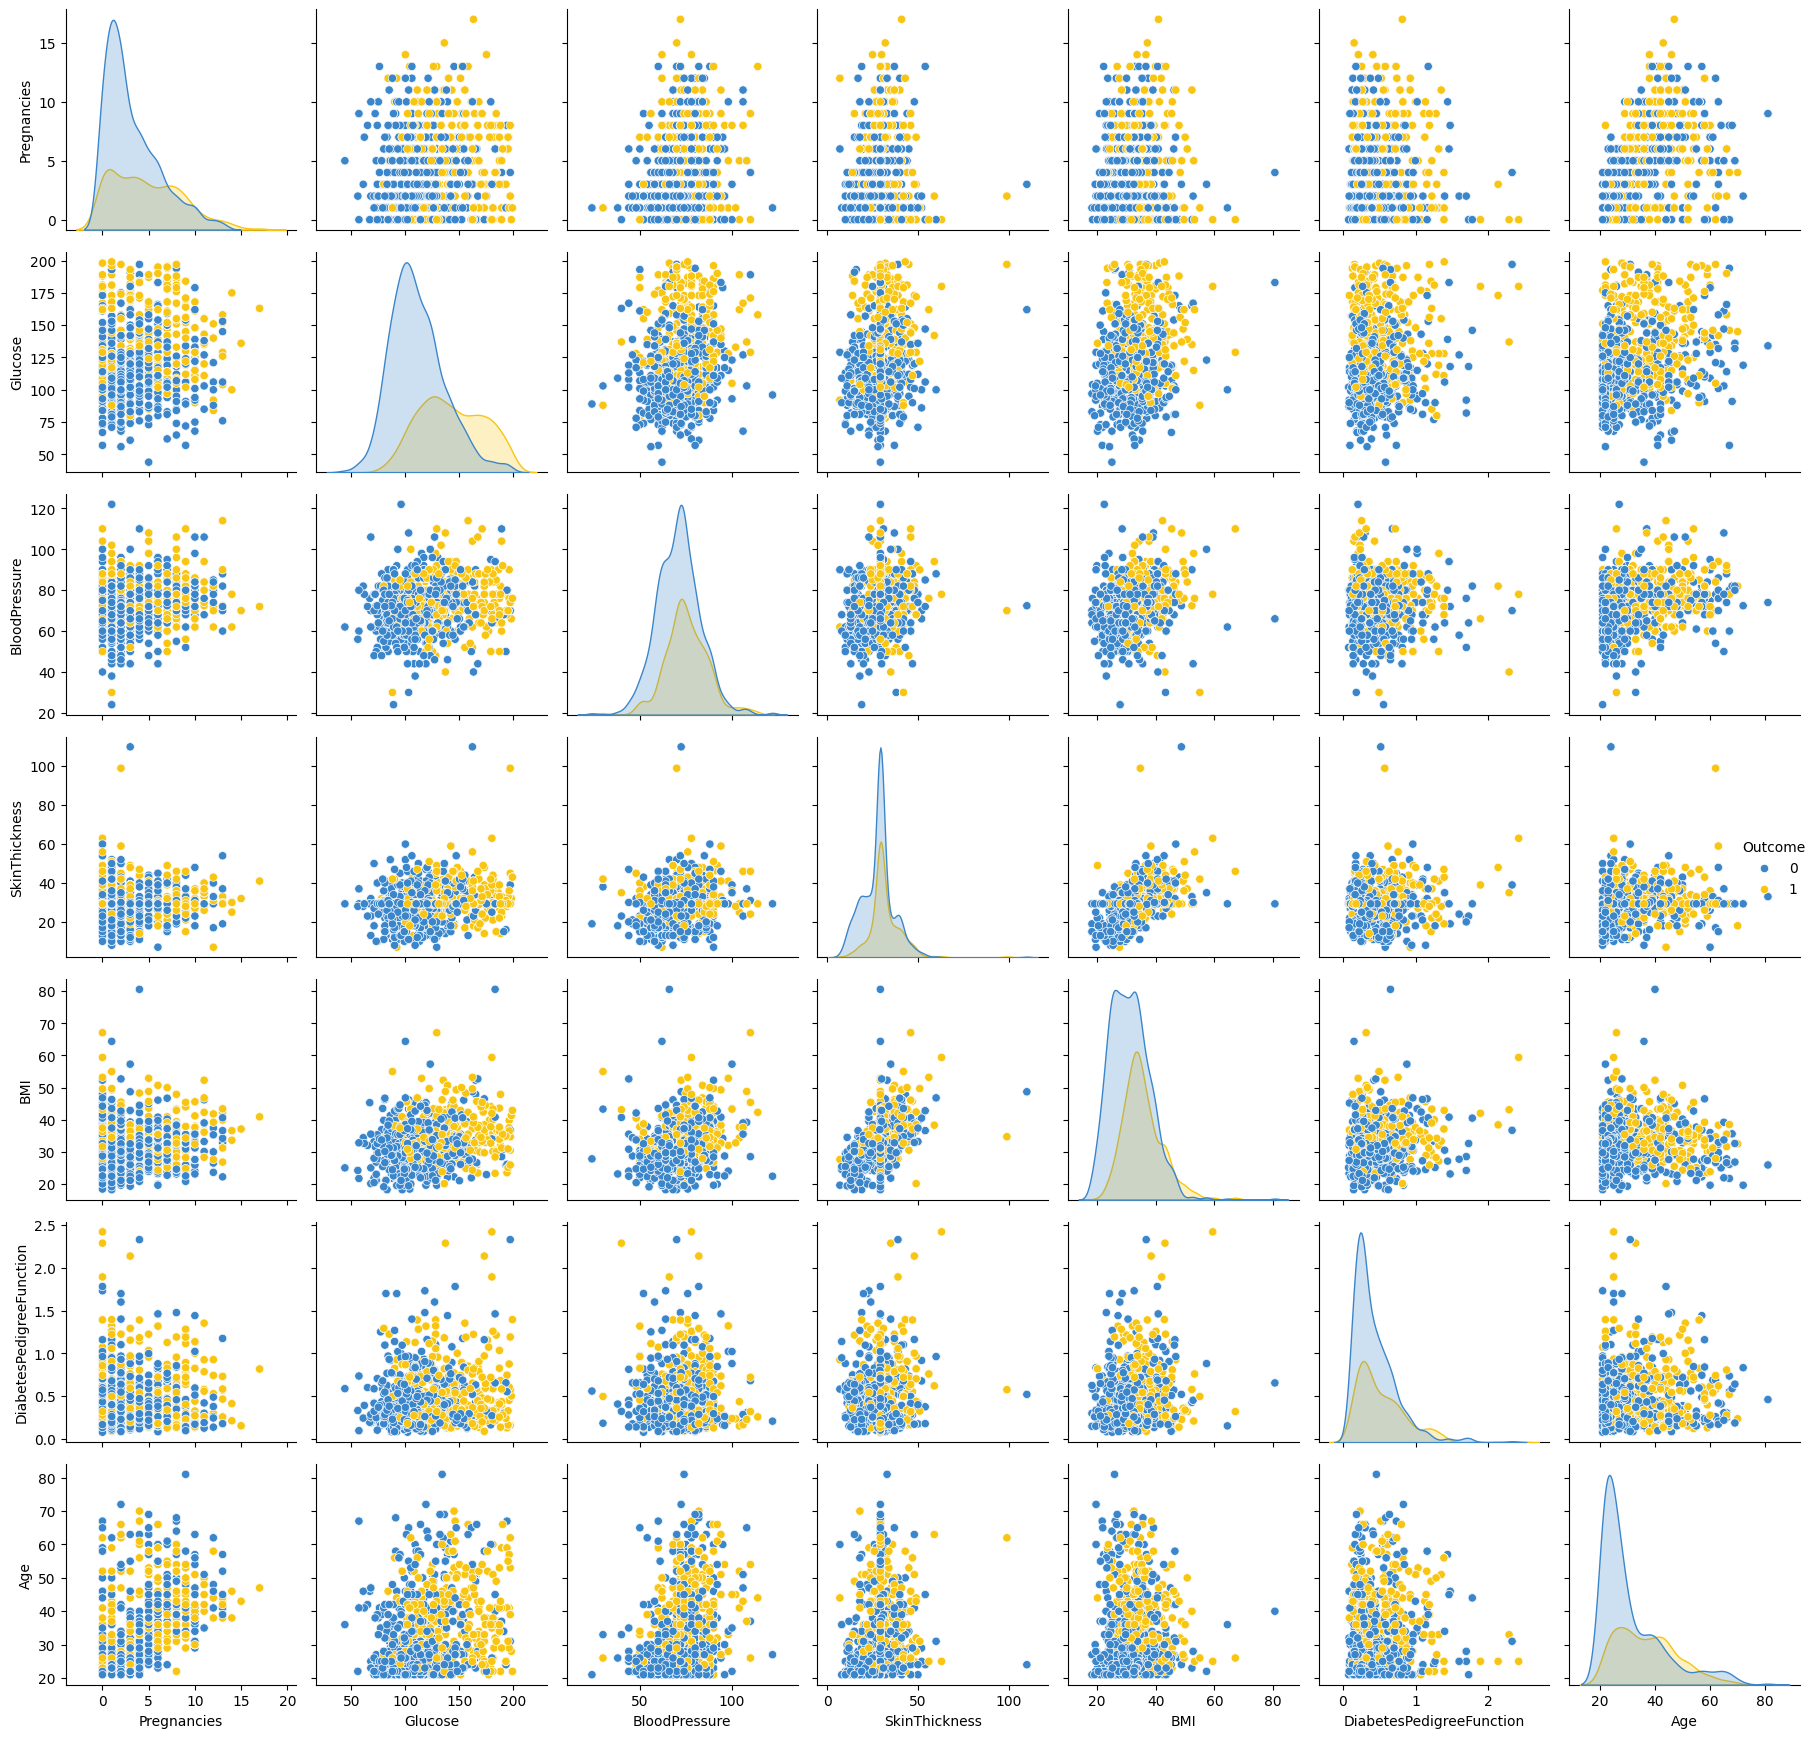

In [178]:
sns.pairplot(data=df, vars=df.columns[1:8], hue="Outcome", palette=["#3B86CB", "#F8C512"])
plt.tight_layout()

<Axes: >

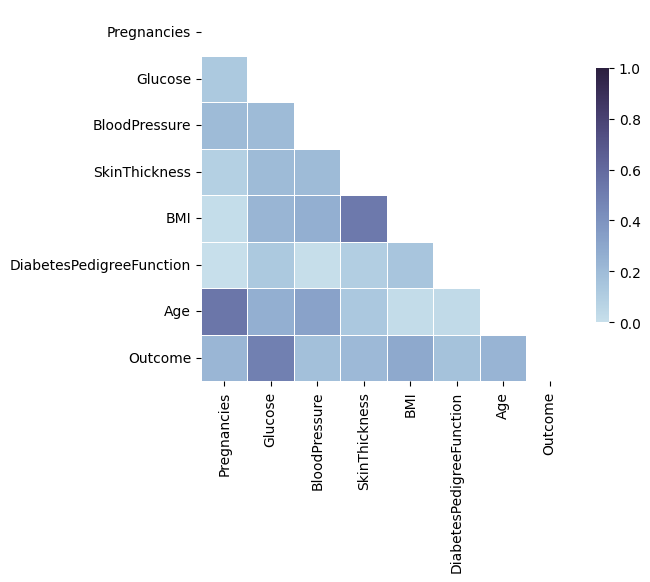

In [148]:
correlation_matrix = df[df.columns[1:]].corr()

fig, ax = plt.subplots(figsize=(6, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.heatmap(correlation_matrix, vmin=0, vmax=1, linewidth=0.5, cmap=cmap, square=True, 
            mask=mask, cbar_kws={"shrink": 0.55} )

In [174]:
correlation_matrix.drop("Outcome")

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123436,0.200860,0.086211,0.013862,-0.027731,0.540805,0.223796
Glucose,0.123436,1.000000,0.204968,0.203992,0.232024,0.127984,0.261941,0.489074
BloodPressure,0.200860,0.204968,1.000000,0.200212,0.265114,0.007852,0.323675,0.172116
SkinThickness,0.086211,0.203992,0.200212,1.000000,0.524172,0.094273,0.131754,0.208093
BMI,0.013862,0.232024,0.265114,0.524172,1.000000,0.145022,0.020287,0.290028
DiabetesPedigreeFunction,-0.027731,0.127984,0.007852,0.094273,0.145022,1.000000,0.028544,0.160664
Age,0.540805,0.261941,0.323675,0.131754,0.020287,0.028544,1.000000,0.237050


In [170]:
correlation_between_features = (correlation_matrix.where(np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1))
                                .stack()
                                .sort_values(ascending=False))

print(f"The top 10 highest correlation coefficients between individual features: \n\n{correlation_between_features.nlargest(10)}")

The top 10 highest correlation coefficients between individual features: 

Pregnancies    Age        0.540805
SkinThickness  BMI        0.524172
Glucose        Outcome    0.489074
BloodPressure  Age        0.323675
BMI            Outcome    0.290028
BloodPressure  BMI        0.265114
Glucose        Age        0.261941
Age            Outcome    0.237050
Glucose        BMI        0.232024
Pregnancies    Outcome    0.223796
dtype: float64


In [160]:
corr_with_outcome = correlation_matrix.drop("Outcome")["Outcome"].sort_values(ascending=False)
print(f"Correlation coefficient of individual features with the target: \n\n{corr_with_outcome}")

Correlation coefficient of individual features with the target: 

Glucose                     0.489074
BMI                         0.290028
Age                         0.237050
Pregnancies                 0.223796
SkinThickness               0.208093
BloodPressure               0.172116
DiabetesPedigreeFunction    0.160664
Name: Outcome, dtype: float64


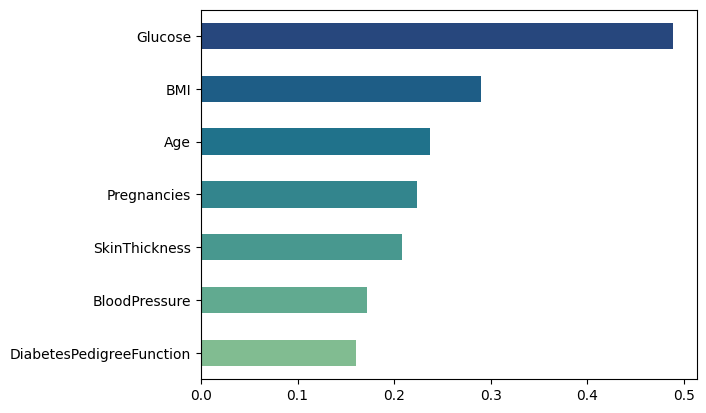

In [209]:
color = sns.color_palette('crest', 7)
color.reverse()
corr_with_outcome.plot.barh(color=color).invert_yaxis()

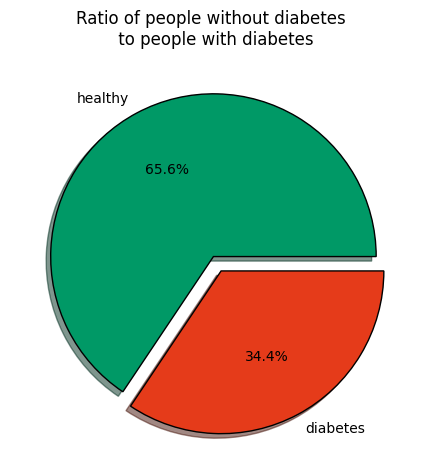

In [184]:
outcome_count = df['Outcome'].value_counts()

outcome_count.plot(kind="pie",
                    title="Ratio of people without diabetes \n to people with diabetes",
                    labels=["healthy", "diabetes"], 
                    ylabel="",
                    colors=["#009966", "#E53B1A"], 
                    explode=[0, 0.1], 
                    shadow=True, 
                    autopct='%1.1f%%', 
                    radius=1, 
                    wedgeprops={"edgecolor": "black"})

plt.tight_layout()
plt.show()